# Transformer models

## Before transformers: Static Embeddings

### One hot encoding

![one-hot](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*T5jaa2othYfXZX9W.)

### Word2Vec

![word2vec-vec](http://jalammar.github.io/images/word2vec/word2vec.png)

![word2vec](https://miro.medium.com/v2/resize:fit:1394/format:webp/0*XMW5mf81LSHodnTi.png)

### Проблема 1: статичних Embeddings недостатньо

- Приклад 1:
"Panda" + "Kung Fu" == "Kung Fu Panda" ?

Панда (в дикій природі), яка знає Кунг-фу != конкретний персонаж мультфільму "Панда Кунг-Фу"

- Приклад 2: The animal didn't cross the street because **it** was too tired.

Слово "воно" не існує незалежно від відповідного іменника.

### Проблема 2: RNNs працюють послідовно і тому повільно. Потрібна архітектура, яку легко паралелізувати
![rnn](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*oY-GwnsZDEaHdVyf.gif)

## Transformer architecture(s)

Basic components:
- **attention** blocks
- fully connected layers

http://jalammar.github.io/illustrated-transformer/

In [2]:
# Attention

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def attention(query, key, value):
    """Compute attention scores."""
    # Calculate dot product of query and key
    scores = np.dot(query, key)
    
    # Apply softmax to obtain attention weights
    attention_weights = softmax(scores)
    
    # Weighted sum of value vectors
    output = np.dot(attention_weights, value)
    
    return output, attention_weights

# Example input
query = np.array([0.5, 0.2, 0.1])  # Query vector
key = np.array([[0.8, 0.2, 0.1],    # Key vectors
                 [0.3, 0.6, 0.4],
                 [0.2, 0.5, 0.7]])
value = np.array([[3, 0],            # Value vectors
                  [5, 6],
                  [7, 8]])

# Compute attention
output, attention_weights = attention(query, key.T, value)

print("Attention output:", output)
print("Attention weights:", attention_weights)


Attention output: [4.87818675 4.39924054]
Attention weights: [0.36973655 0.32143352 0.30882993]


In [3]:
scores = np.dot(query, key)
scores

array([0.48, 0.27, 0.2 ])

In [4]:
attention_weights = softmax(scores)
attention_weights

array([0.38965573, 0.3158488 , 0.29449547])

In [5]:
output = np.dot(attention_weights, value)
output

array([4.80967947, 4.25105654])

In [6]:
# Calculate attention weights

from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sentence
sentence = "The animal didn't cross the street because it was too tired."

# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)
print("Tokens:", tokens)

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)

# Assuming query, key, and value are all token embeddings obtained from BERT
# For simplicity, let's assume query, key, and value are all randomly generated for each token
query = np.random.rand(len(token_ids), 768)  # 768 is the dimensionality of BERT embeddings
key = np.random.rand(len(token_ids), 768)
value = np.random.rand(len(token_ids), 768)

# Compute attention scores
outputs = []
attention_weights = []
for i in range(len(token_ids)):
    output, attn_weights = attention(query[i], key.T, value)
    outputs.append(output)
    attention_weights.append(attn_weights)

print("Attention output for each token:", outputs)
print("Attention weights for each token:", attention_weights)


Tokens: ['the', 'animal', 'didn', "'", 't', 'cross', 'the', 'street', 'because', 'it', 'was', 'too', 'tired', '.']
Token IDs: [1996, 4111, 2134, 1005, 1056, 2892, 1996, 2395, 2138, 2009, 2001, 2205, 5458, 1012]
Attention output for each token: [array([0.93654837, 0.79057497, 0.26134623, 0.25099081, 0.38438635,
       0.76497291, 0.65843213, 0.10945567, 0.36210024, 0.64554109,
       0.81085852, 0.57087946, 0.73961942, 0.5523396 , 0.91145805,
       0.17263563, 0.52094036, 0.65717922, 0.1091768 , 0.58229422,
       0.94116542, 0.8008143 , 0.24419234, 0.68863723, 0.18766824,
       0.67367013, 0.59574745, 0.27669798, 0.9566125 , 0.32676748,
       0.6427826 , 0.21890557, 0.17416316, 0.4190647 , 0.68753176,
       0.57475754, 0.2363568 , 0.18906887, 0.3369362 , 0.25014077,
       0.50544634, 0.90171211, 0.8780068 , 0.6698849 , 0.33053715,
       0.54386734, 0.53760301, 0.5148283 , 0.73597066, 0.34748003,
       0.28277581, 0.37635637, 0.21059362, 0.84683224, 0.86404355,
       0.60709821,

In [7]:
len(tokens) # tokens

14

In [8]:
len(outputs[0]) # embeddings

768

In [9]:
outputs[0]

array([0.93654837, 0.79057497, 0.26134623, 0.25099081, 0.38438635,
       0.76497291, 0.65843213, 0.10945567, 0.36210024, 0.64554109,
       0.81085852, 0.57087946, 0.73961942, 0.5523396 , 0.91145805,
       0.17263563, 0.52094036, 0.65717922, 0.1091768 , 0.58229422,
       0.94116542, 0.8008143 , 0.24419234, 0.68863723, 0.18766824,
       0.67367013, 0.59574745, 0.27669798, 0.9566125 , 0.32676748,
       0.6427826 , 0.21890557, 0.17416316, 0.4190647 , 0.68753176,
       0.57475754, 0.2363568 , 0.18906887, 0.3369362 , 0.25014077,
       0.50544634, 0.90171211, 0.8780068 , 0.6698849 , 0.33053715,
       0.54386734, 0.53760301, 0.5148283 , 0.73597066, 0.34748003,
       0.28277581, 0.37635637, 0.21059362, 0.84683224, 0.86404355,
       0.60709821, 0.30992929, 0.53264812, 0.55282016, 0.86260688,
       0.97560818, 0.97431614, 0.2766414 , 0.35722912, 0.96499174,
       0.92768709, 0.63353877, 0.01347862, 0.97024529, 0.29668278,
       0.25495988, 0.86090168, 0.08725751, 0.61608143, 0.49689

In [10]:
len(attention_weights[0]) # attention_weights of each word to each word

14

In [11]:
attention_weights[0]

array([1.09296833e-05, 3.68542013e-04, 1.37985091e-04, 8.34223544e-05,
       9.01272740e-04, 9.69384552e-01, 3.10503782e-07, 1.09499390e-04,
       2.62954934e-02, 3.71645315e-05, 1.58145969e-05, 2.66770624e-07,
       1.97910679e-03, 6.75640099e-04])

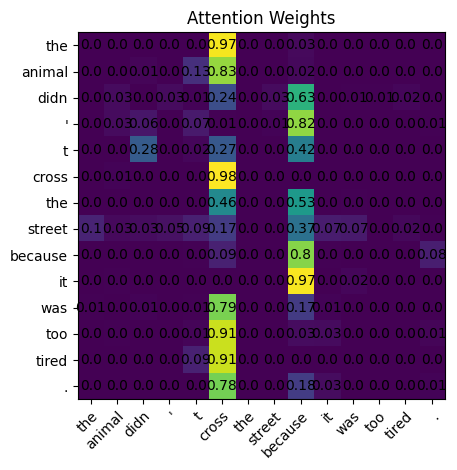

In [12]:
import matplotlib.pyplot as plt

# Function to plot attention weights
def plot_attention_weights(attention_weights, tokens):
    fig, ax = plt.subplots()
    im = ax.imshow(attention_weights, cmap='viridis')

    # Set ticks for tokens
    ax.set_xticks(np.arange(len(tokens)))
    ax.set_yticks(np.arange(len(tokens)))
    # Label ticks with the respective list entries
    ax.set_xticklabels(tokens)
    ax.set_yticklabels(tokens)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            text = ax.text(j, i, round(attention_weights[i, j], 2), ha="center", va="center", color="black")

    ax.set_title("Attention Weights")
    fig.tight_layout()
    plt.show()

# Convert attention weights list to numpy array
attention_weights_array = np.array(attention_weights)

# Plot attention weights
plot_attention_weights(attention_weights_array, tokens)


![att](https://i.imgur.com/PHWQnbX.png)

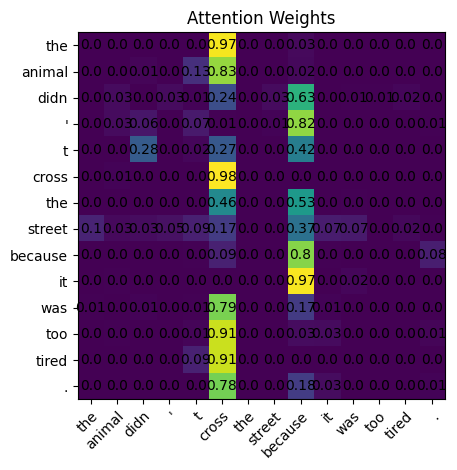

In [13]:
# Convert attention weights list to numpy array
attention_weights_array_bert = np.array(attention_weights)

# Plot attention weights
plot_attention_weights(attention_weights_array_bert, tokens)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Embedding
from tensorflow.keras.models import Model

class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(num_heads, d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])

        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.mha(x, x, x)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(TransformerEncoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = Embedding(input_vocab_size, d_model)
        self.pos_encoding = self.positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = Dropout(rate)

    def call(self, x, training):
        seq_len = tf.shape(x)[1]

        # Adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training)

        return x

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_layers': self.num_layers,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dff': self.dff,
            'input_vocab_size': self.input_vocab_size,
            'maximum_position_encoding': self.maximum_position_encoding,
            'rate': self.rate,
        })
        return config

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)

        # apply sin to even indices in the array; 2i
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

        # apply cos to odd indices in the array; 2i+1
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        pos_encoding = angle_rads[np.newaxis, ...]

        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

# Example usage
num_layers = 6
d_model = 512
num_heads = 8
dff = 2048
input_vocab_size = 10000
maximum_position_encoding = 10000
rate = 0.1

inputs = Input(shape=(None,))
encoder = TransformerEncoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, maximum_position_encoding, rate)

outputs = encoder(inputs)
model = Model(inputs, outputs)

model.summary()


## Pretrained models and Finetuning

https://huggingface.co/learn/nlp-course/en/chapter1/4

![arch](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example5.png)

In [13]:
# use DistilBERT out of the box
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from datasets import load_dataset

# Load IMDb dataset
dataset = load_dataset('imdb')

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
pretrained_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Example text for prediction
example_text = "This movie was great! I loved the acting and the storyline."

# Tokenize input text
inputs = tokenizer(example_text, return_tensors='pt')
inputs

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[ 101, 2023, 3185, 2001, 2307,  999, 1045, 3866, 1996, 3772, 1998, 1996,
         9994, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
# Make prediction
outputs_pretrained = pretrained_model(**inputs)
predicted_label_pretrained = torch.argmax(outputs_pretrained.logits).item()

# Map predicted label to sentiment
sentiment_pretrained = 'positive' if predicted_label_pretrained == 1 else 'negative'

print("Predicted sentiment:", sentiment_pretrained)

Predicted sentiment: negative


In [7]:
# Finetune DistilBERT

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from datasets import load_dataset

# Load IMDb dataset
dataset = load_dataset('imdb')

# Split dataset into train and test sets
train_texts, test_texts = train_test_split(dataset['train']['text'], test_size=0.2, random_state=42)
train_labels, test_labels = train_test_split(dataset['train']['label'], test_size=0.2, random_state=42)

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Tokenize input texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# Create torch datasets
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
# Define training arguments
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    logging_dir='./logs',
    output_dir="."

)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate(eval_dataset=test_dataset)
print(eval_results)

Step,Training Loss
500,0.403500
1000,0.334500
1500,0.287700
2000,0.274200
2500,0.248500


Checkpoint destination directory ./checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 0.23729760944843292, 'eval_runtime': 272.6495, 'eval_samples_per_second': 18.339, 'eval_steps_per_second': 2.292, 'epoch': 1.0}


In [10]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [12]:
# Make prediction
# Example text for prediction
example_text = "This movie was great! I loved the acting and the storyline."

# Tokenize input text
inputs = tokenizer(example_text, return_tensors='pt')
# if you work on a mac:
#inputs = tokenizer(example_text, return_tensors='pt').to("mps")
outputs = model(**inputs)
predicted_label = torch.argmax(outputs.logits).item()

# Map predicted label to sentiment
sentiment = 'positive' if predicted_label == 1 else 'negative'

print("Predicted sentiment:", sentiment)

Predicted sentiment: positive


## From BERT to LLMs

https://arxiv.org/abs/2402.06196v2